# Wine Recommender System - Exploratory Data Analysis

### Project Goal: 

This project uses a Kaggle database of over 129,000 wine reviews from Wine Enthusiast/Wine Magazine. The data contains information related to variety, price, rating, and tasting notes. My desired outcome is to create a wine recommender that, when a user inputs a wine name (hopefully as specific as winery), it will recommend a similar wine. The similarity will be based on variety, tasting notes, and price. 

### What's in This Notebook
In this notebook, I conduct some preliminary EDA on the dataset, removing duplicates, make decisions on how to deal with variables that only have a few values. 

Next, I have great fun with plotting and data visualization using Seaborn and Tableau. 

### Planned Model:

At the end of this notebook, I started to use CountVectorizer to identify the most common words used in the reviews. I think I will also need to use Term-Frequency Inverse Document Frequency to downweight some of the more common words. 

I will try a K Nearest Neighbors model to create the recommendation. Somehow, I want someone to be able to choose a wine from the database and have the model spit out the top three recommendations (nearest neighbors) for that wine. I think the features I would use in the model would be description, rating, varietal, and price.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from os import path

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
df =pd.read_csv('./winemag-data-130k-v2.csv')
# include this? index_col=0

In [4]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
df.shape

(129971, 14)

In [6]:
df['description'][0]

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

### Dropping duplicate cases. 

There are almost 22,000 duplicate entries that I will drop. After doing so, I still have over 100,000 cases. 

In [7]:
df[df.duplicated(['title'], keep=False)]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
11,11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer
12,12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
13,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
14,14,US,Building on 150 years and six generations of w...,NaN,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou
16,16,Argentina,"Baked plum, molasses, balsamic vinegar and che...",Felix,87,30.0,Other,Cafayate,NaN,Michael Schachner,@wineschach,Felix Lavaque 2010 Felix Malbec (Cafayate),Malbec,Felix Lavaque
17,17,Argentina,Raw black-cherry aromas are direct and simple ...,Winemaker Selection,87,13.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Gaucho Andino 2011 Winemaker Selection Malbec ...,Malbec,Gaucho Andino
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
41,41,US,"A stiff, tannic wine, this slowly opens and br...",NaN,86,22.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Hawkins Cellars 2009 Pinot Noir (Willamette Va...,Pinot Noir,Hawkins Cellars


In [8]:
df.drop_duplicates(subset=['title'], keep=False, inplace=True)
df.shape

(108104, 14)

### Isolating Vintage/Year
I tried to extract the vintage/year from the wine title, but it's a bit more complicated than I thought. Some titles have years that are not the true vintage - for example, "Cristobal 1492 2007 Cabernet Sauvignon" was not made in 1492. Other wines do not have a vintage, so say "NV" instead, but may in fact have a non-vintage date - for example, "Bagrationi 1882 NV Classic Extra Dry Sparkling", appears the wine was made in 1882 which is not correct. I don't think there's a set pattern to the order of numbers, so I don't know that I can accurately isolate year. 

In [9]:
df['year'] = df['title'].str.extract('(\d{4})', expand=True)
df.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013


In [10]:
df['year'].value_counts(ascending=False)

2012    12855
2013    12643
2014    12249
2011    10432
2010    10283
2009     8624
2015     7800
2008     6572
2007     6368
2006     5325
2005     3332
2016     2918
2004     1644
2000      744
2001      677
1999      633
2003      547
1998      538
2002      349
1997      301
1996       65
1995       49
1852       41
1994       23
1898       19
1992       16
7200       12
2017       11
1868        7
1912        6
        ...  
1887        2
1150        2
1986        2
1847        1
1945        1
1974        1
1941        1
1752        1
1070        1
3000        1
1973        1
1503        1
1607        1
1947        1
1976        1
1935        1
1968        1
1969        1
1961        1
1957        1
1967        1
1789        1
1621        1
1934        1
1982        1
1919        1
1845        1
1872        1
1904        1
1965        1
Name: year, Length: 90, dtype: int64

### Keeping the top 20 types of varietals. 

There are a great many uncommon types of varietals, and I will only keep the top 20 in order to have a good number of cases of each. 

In [11]:
print(df['variety'].value_counts().to_string())

Pinot Noir                             11147
Chardonnay                              9827
Cabernet Sauvignon                      8178
Red Blend                               7496
Bordeaux-style Red Blend                5857
Riesling                                4331
Sauvignon Blanc                         4126
Syrah                                   3504
Rosé                                    2867
Merlot                                  2675
Nebbiolo                                2395
Zinfandel                               2335
Malbec                                  2240
Sangiovese                              2211
Portuguese Red                          2075
White Blend                             1979
Tempranillo                             1526
Sparkling Blend                         1400
Rhône-style Red Blend                   1212
Pinot Gris                              1184
Cabernet Franc                          1131
Grüner Veltliner                        1050
Portuguese

In [12]:
#code to only keep top 20 varieties of wine
varieties = df['variety'].value_counts()
varieties

Pinot Noir                        11147
Chardonnay                         9827
Cabernet Sauvignon                 8178
Red Blend                          7496
Bordeaux-style Red Blend           5857
Riesling                           4331
Sauvignon Blanc                    4126
Syrah                              3504
Rosé                               2867
Merlot                             2675
Nebbiolo                           2395
Zinfandel                          2335
Malbec                             2240
Sangiovese                         2211
Portuguese Red                     2075
White Blend                        1979
Tempranillo                        1526
Sparkling Blend                    1400
Rhône-style Red Blend              1212
Pinot Gris                         1184
Cabernet Franc                     1131
Grüner Veltliner                   1050
Portuguese White                    951
Pinot Grigio                        904
Champagne Blend                     896


In [13]:
df = df.loc[df['variety'].isin(varieties.axes[0][:20])]
df['variety'].value_counts()

Pinot Noir                  11147
Chardonnay                   9827
Cabernet Sauvignon           8178
Red Blend                    7496
Bordeaux-style Red Blend     5857
Riesling                     4331
Sauvignon Blanc              4126
Syrah                        3504
Rosé                         2867
Merlot                       2675
Nebbiolo                     2395
Zinfandel                    2335
Malbec                       2240
Sangiovese                   2211
Portuguese Red               2075
White Blend                  1979
Tempranillo                  1526
Sparkling Blend              1400
Rhône-style Red Blend        1212
Pinot Gris                   1184
Name: variety, dtype: int64

### Dealing with Null Values

In [14]:
df.isnull().sum()

Unnamed: 0                   0
country                     31
description                  0
designation              22544
points                       0
price                     4847
province                    31
region_1                 11369
region_2                 42128
taster_name              16897
taster_twitter_handle    19986
title                        0
variety                      0
winery                       0
year                      1352
dtype: int64

Dropping these rows that have several nulls. I may use these variables in plots or models, so I won't drop the entire columns.

In [15]:
df = df.dropna(subset=['country'])
df = df.dropna(subset=['province'])
df = df.dropna(subset=['price'])

I will also drop the columns that not only have lots of nulls, but also I don't think I will use in the model (e.g., the taster's name and twitter handle).

In [16]:
df = df.drop(['designation', 'region_1', 'region_2','taster_name', 'taster_twitter_handle' ], axis=1)

In [17]:
df.isnull().sum()

Unnamed: 0        0
country           0
description       0
points            0
price             0
province          0
title             0
variety           0
winery            0
year           1244
dtype: int64

In [18]:
df.to_csv('wine_for_viz.csv', index=False)

## Fun with Matplotlib and Seaborn!

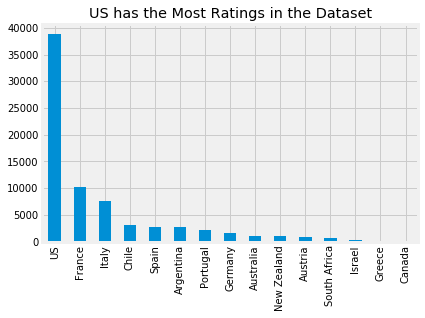

In [17]:
#print(df['country'].value_counts().to_string())
plt.title('US has the Most Ratings in the Dataset')
df['country'].value_counts().head(15).plot.bar()

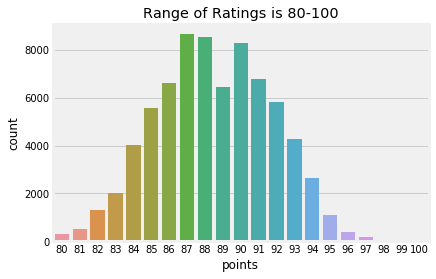

In [18]:
#df['points'].value_counts()
#df['points'].value_counts().sort_index().plot.bar()
plt.title('Range of Ratings is 80-100')
sns.countplot(df['points'])

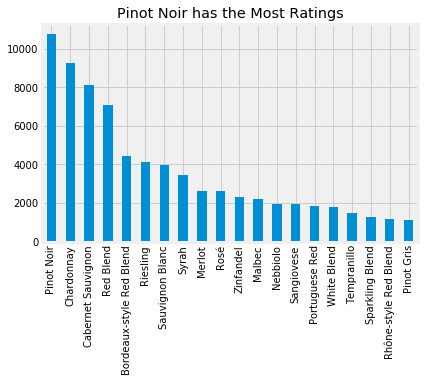

In [19]:
#print(df['variety'].value_counts().to_string())
plt.title("Pinot Noir has the Most Ratings")
df['variety'].value_counts().head(20).plot.bar()

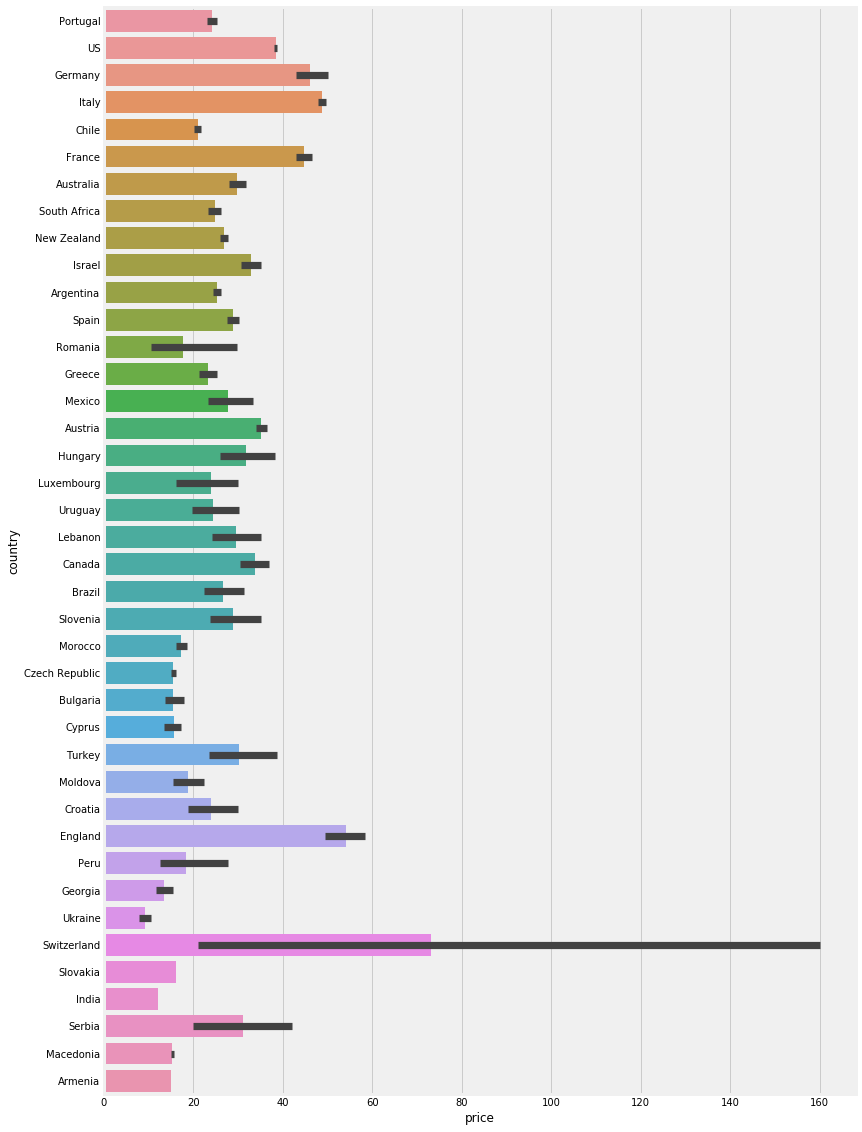

In [20]:
plt.figure(figsize=(12,20))
sns.barplot(x = 'price', y = 'country', data = df)

{'boxes': [<matplotlib.lines.Line2D at 0x11a13c978>],
 'caps': [<matplotlib.lines.Line2D at 0x11a137390>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a12ff60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11a131b00>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11a13c588>,
  <matplotlib.lines.Line2D at 0x11a1393c8>]}

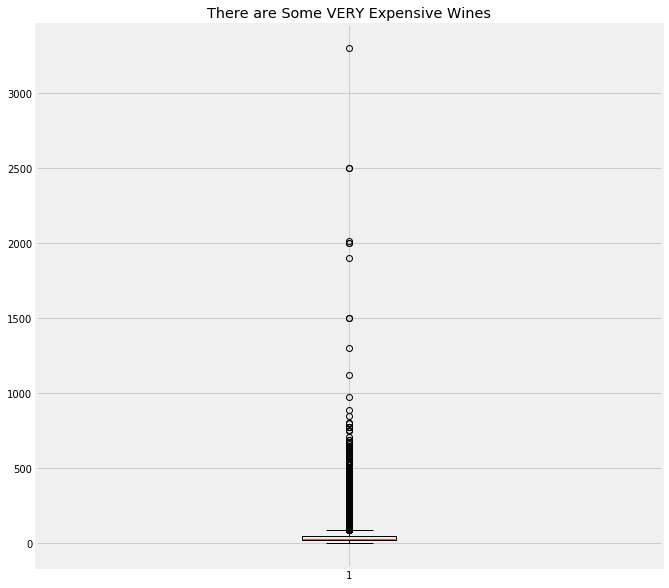

In [21]:
plt.figure(figsize=(10,10))
plt.title("There are Some VERY Expensive Wines")
plt.boxplot(df['price'])

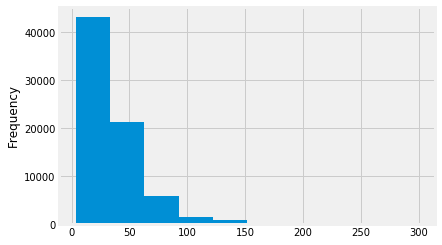

In [22]:
#There are some wines pricedup to $3300. Should I remove super high priced wines? 
#df['price'].sort_values(ascending=False)
df[df['price'] < 300]['price'].plot.hist()
#df['price'].plot.hist()

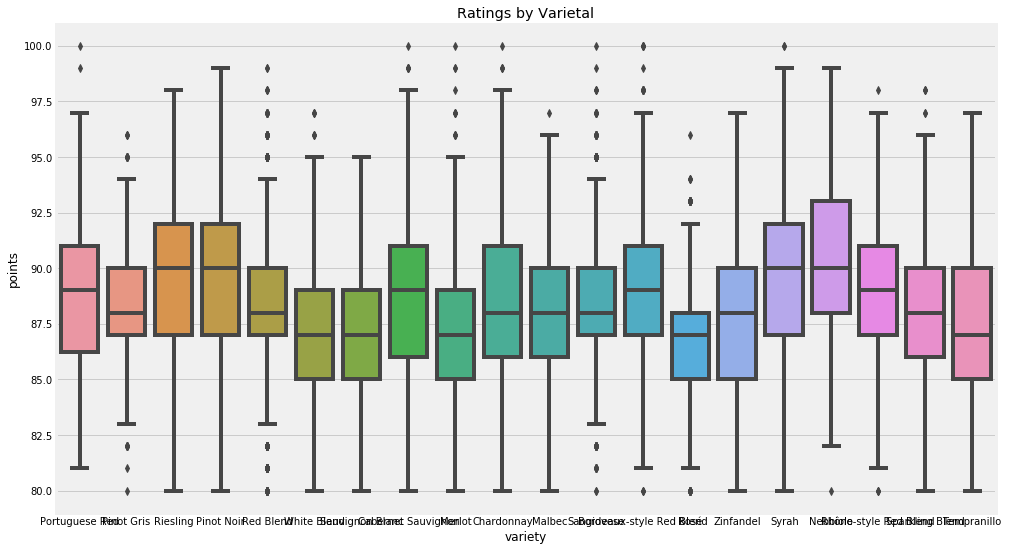

In [23]:
plt.figure(figsize=(15,9))
plt.title("Ratings by Varietal")
sns.boxplot(x='variety', y='points', data=df)

## Fun with Tableau!

The first charts are just .jpgs inserted into the notebook. Later, I tried to actually embed the online charts so that they are more interactive. 

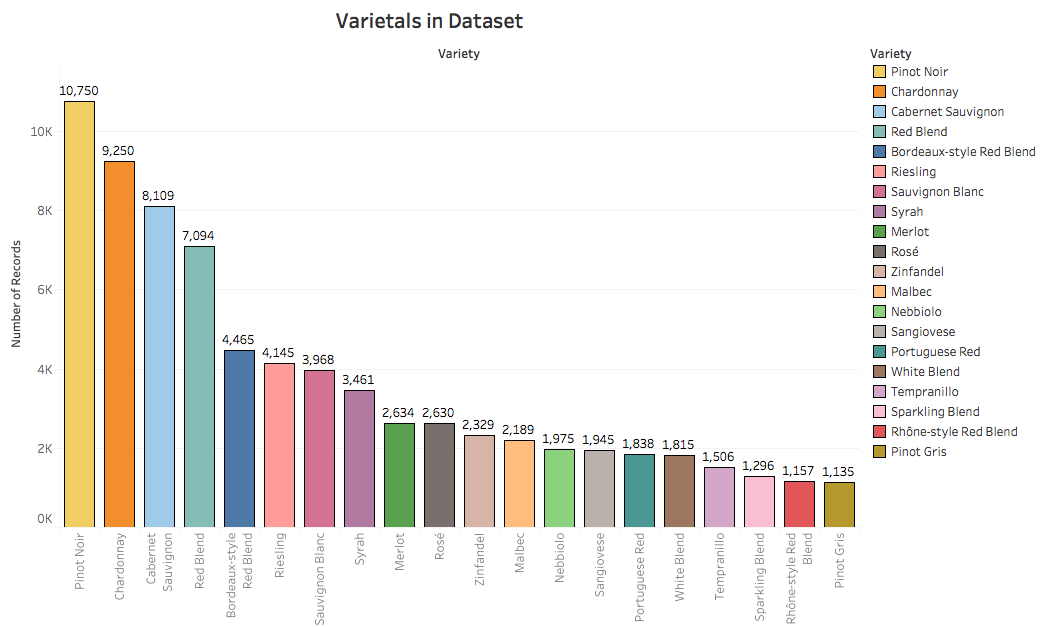

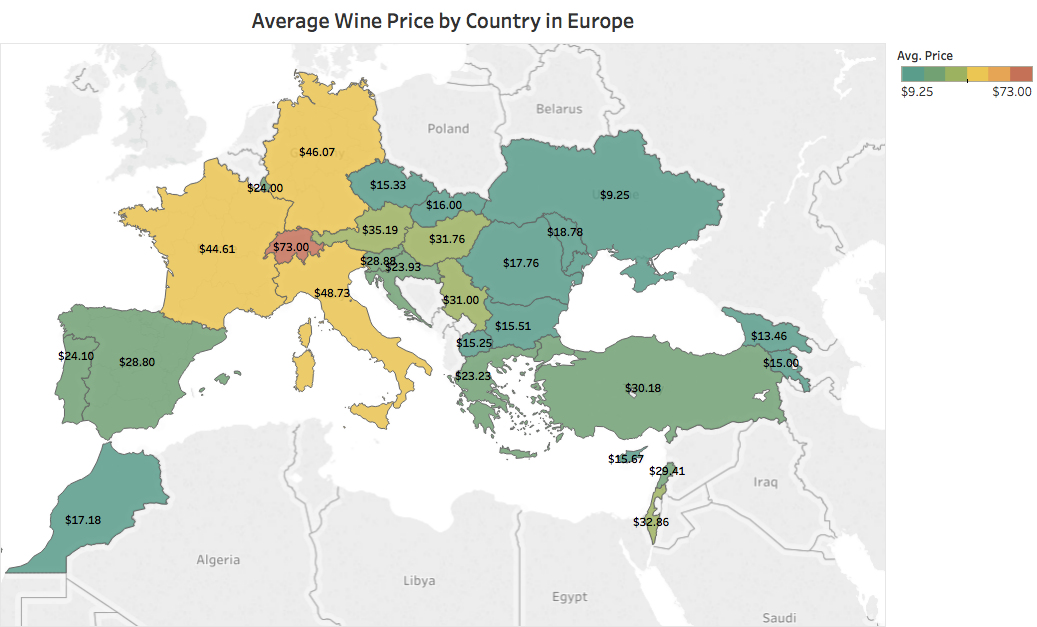

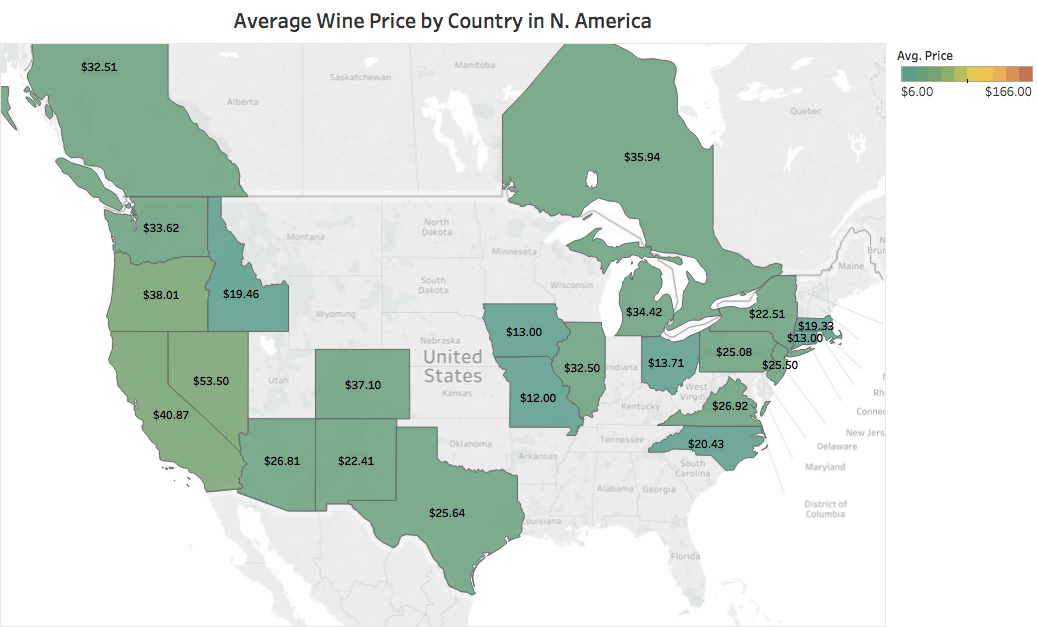

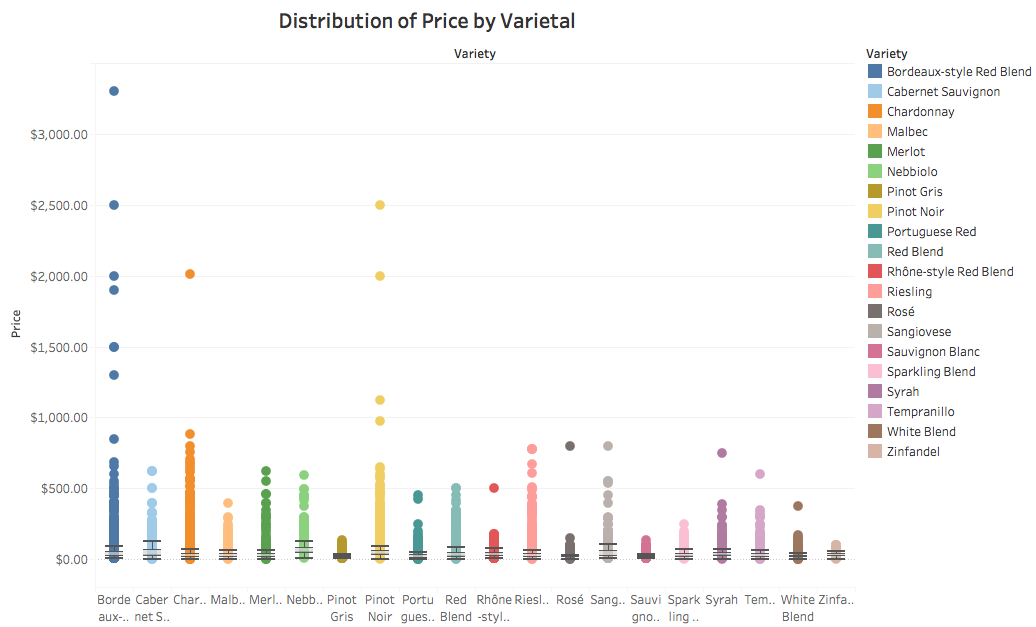

#### Here are the online versions. I don't know if they will work.

In [24]:
%%HTML

<script type='text/javascript' src='https://us-west-2b.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1440px; height: 606px;'><object class='tableauViz' width='1440' height='606' style='display:none;'><param name='host_url' value='https%3A%2F%2Fus-west-2b.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;morganmurphytableauviz' /><param name='name' value='WineVisualization&#47;Varietals' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /><param name='filter' value='iframeSizedToWindow=true' /></object></div>

In [25]:
%%HTML

<script type='text/javascript' src='https://us-west-2b.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1440px; height: 606px;'><object class='tableauViz' width='1440' height='606' style='display:none;'><param name='host_url' value='https%3A%2F%2Fus-west-2b.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;morganmurphytableauviz' /><param name='name' value='WineVisualization&#47;PricebyVarietal' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /><param name='filter' value='iframeSizedToWindow=true' /></object></div>

In [26]:
%%HTML

<script type='text/javascript' src='https://us-west-2b.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1440px; height: 606px;'><object class='tableauViz' width='1440' height='606' style='display:none;'><param name='host_url' value='https%3A%2F%2Fus-west-2b.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;morganmurphytableauviz' /><param name='name' value='WineVisualization&#47;PriceDistribution' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /><param name='filter' value='iframeSizedToWindow=true' /></object></div>

In [27]:
%%HTML

<script type='text/javascript' src='https://us-west-2b.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1440px; height: 606px;'><object class='tableauViz' width='1440' height='606' style='display:none;'><param name='host_url' value='https%3A%2F%2Fus-west-2b.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;morganmurphytableauviz' /><param name='name' value='WineVisualization&#47;PriceEurope' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /><param name='filter' value='iframeSizedToWindow=true' /></object></div>

In [28]:
%%HTML

<script type='text/javascript' src='https://us-west-2b.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1440px; height: 606px;'><object class='tableauViz' width='1440' height='606' style='display:none;'><param name='host_url' value='https%3A%2F%2Fus-west-2b.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;morganmurphytableauviz' /><param name='name' value='WineVisualization&#47;Price-N_Amer' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /><param name='filter' value='iframeSizedToWindow=true' /></object></div>

In [29]:
%%HTML

<script type='text/javascript' src='https://us-west-2b.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1440px; height: 606px;'><object class='tableauViz' width='1440' height='606' style='display:none;'><param name='host_url' value='https%3A%2F%2Fus-west-2b.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;morganmurphytableauviz' /><param name='name' value='WineVisualization&#47;WinePricesovertime' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /><param name='filter' value='iframeSizedToWindow=true' /></object></div>

In [30]:
#df = df[df.price <= 200]

## Fun with WordClouds!

Just for fun, I created a wordclouds for California Chardonnarys and California Cabernets. 

This exercise was actually useful for transitioning to the next part in the project, which will be digging into the descriptions and trying to find common words. 

The method I found involved creating a separate text file with just the descriptions I wanted. I'd like to figure out how to just reference the dataframe column, isolating descriptions by varietal and location. 

In [32]:
CAChards = pd.read_csv('./CAChards.csv')

In [33]:
CACabs = pd.read_csv('./CACabs.csv')

When I first ran the wordclouds, the most common word was "WINE" and "FLAVOR", which was not helpful, so I made those stopwords.

In [34]:
stopwords = set(STOPWORDS)
stopwords.add("wine")
stopwords.add("flavor")
stopwords.add("flavors")
stopwords.add("chardonnay")
stopwords.add("cab")
stopwords.add("cabernet")

In [35]:
wordcloud = WordCloud(stopwords = stopwords).generate(' '.join(CAChards['Description']))
wordcloud2 = WordCloud(stopwords=stopwords).generate(' '.join(CACabs['description']))

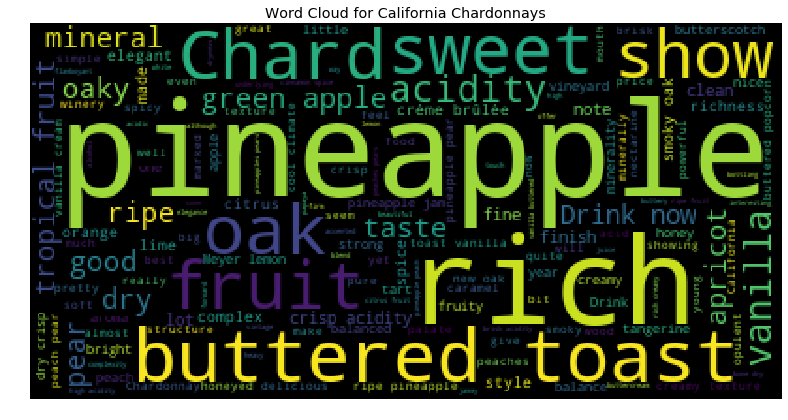

In [36]:
plt.figure(figsize=(12,9))
plt.title("Word Cloud for California Chardonnays")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

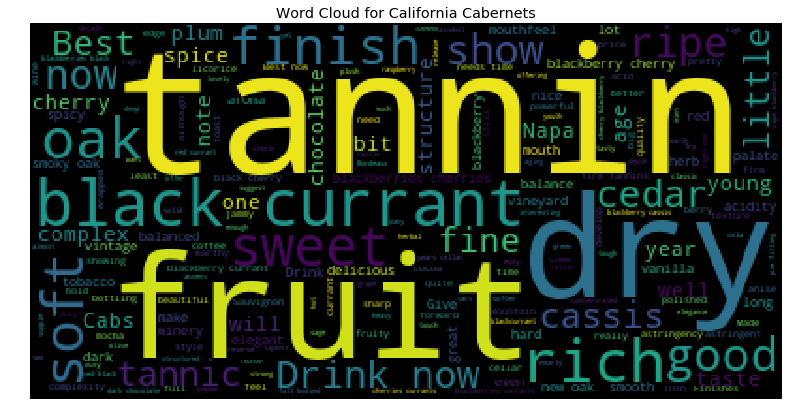

In [37]:
plt.figure(figsize=(12,9))
plt.title("Word Cloud for California Cabernets")
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

## Natural Language Processing

The remainder of the notebook is me trying to muddle my way through NLP. 

In [38]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_colwidth', 999)

In [39]:
sample_text = df['description'][0:20]
sample_text

1                                     This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.
2                                                                              Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.
3                                                                 Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.
4               Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfus

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer()

cvec.fit(sample_text)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict', encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

new_df  = pd.DataFrame(cvec.transform(sample_text).todense(),
             columns=cvec.get_feature_names())

new_df.transpose().sort_values(0, ascending=False).transpose()

,is,it,with,and,filled,this,smooth,still,drinkable,freshened,from,juicy,be,out,berry,better,fruits,fruity,red,ripe,are,that,already,2016,firm,acidity,structured,tannins,while,wine,although,will,certainly,pokes,pretty,racy,production,plum,raspberry,quaffer,rather,regular,re,recall,refreshing,pleasantly,rich,riesling,rind,ripeness,robust,rosemary,rough,rustic,salad,sauce,sauvignon,plenty,2010,pith,pinot,of,oaked,oak,now,notes,not,nose,nonetheless,new,neutral,nature,muscat,much,mouthfeel,more,off,offering,offers,passes,pineapple,pepper,peels,pear,peach,scorched,palate,on,pair,other,oregon,orange,or,opulent,passion,small,sections,unoaked,underscoring,tropical,touch,tones,toned,tomatoes,tobacco,toasted,toast,to,through,think,there,the,texture,unfussy,unripe,seems,value,zealand,you,yet,yellow,winter,widely,wide,white,whether,wet,way,was,vineyard,variety,vanilla,teriyaki,tart,tannic,tangy,spice,somewhat,some,soft,snappy,smoky,modest,slightly,sleek,six,site,similar,shows,shine,semidry,spices,splash,sprightly,streak,syrupy,sweetens,sweet,suggest,structure,strongly,stone,stainless,stew,stem,steeped,steel,staved,start,months,like,mix,crisp,cranberry,country,concentrated,companion,commendable,comes,cola,cocoa,clean,citrus,chocolate,chewy,characteristics,caramel,cabernet,create,cured,buttered,currant,dryness,dry,drizzled,driven,drink,dried,dominate,discern,designates,designated,dense,delivers,delicate,dark,currants,by,but,mingle,as,aromas,aroma,apricot,apple,appeal,anise,animal,ample,alongside,along,all,aged,across,accents,abound,around,asian,brisk,astringent,bright,bounty,bottling,bold,bodied,blossom,blanc,blackberry,black,bitterness,bit,berries,barrel,barbecue,available,dusty,earth,earthy,just,jammy,intermingle,intense,instant,indicated,indeterminate,include,in,impressions,if,honey,hint,high,herbal,herb,jelly,lead,easy,leaf,mineral,meat,mature,many,mango,made,lime,likeability,2012,lightly,licorice,levity,lemon,leather,lean,hearty,has,hard,ham,flower,floor,flesh,flavors,flavor,flat,finish,fermented,feel,fare,falls,fair,espresso,erath,elevation,followed,for,forest,gooseberry,hails,guava,green,graphite,grapefruit,grainy,good,form,giving,gives,give,full,fruit,franc,zesty
0,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Website to review: https://willnetsky.github.io/Beer-Recommender/

The following code is from when I wanted this to be a Colorado wine recommender specifically. I'm keeping the code here as a placeholder in case I do decide to try out that approach after all. 

In [41]:
#I am including 200+ reviews on Colorado wines from Wine Spectator. Will concatenate the two df's. 
#dfcol = pd.read_csv('./ColoradoWSReviews.csv')

In [42]:
# df = pd.concat([df, dfcol], axis=0, join='outer')
# df.reset_index()

In [43]:
# colorado = df[df['province'] == 'Colorado']
# colorado.shape

In [44]:
# colorado

In [45]:
#code to include variety in the stop words
# wine_stop_words = []
# for variety in top_wines_df['variety'].unique():
#     for word in variety.split(' '):
#         wine_stop_words.append(word.lower())
# wine_stop_words = pd.Series(data=wine_stop_words).unique()
# wine_stop_words